In [ ]:
from sklearn.svm import SVC,SVR

import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import numpy as np
import sklearn.datasets as datasets
import sklearn.metrics as metrics

DEFAULT_RANDOM_SEED = 2021

def seedBasic(seed=DEFAULT_RANDOM_SEED):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

In [ ]:
X, y = datasets.make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)


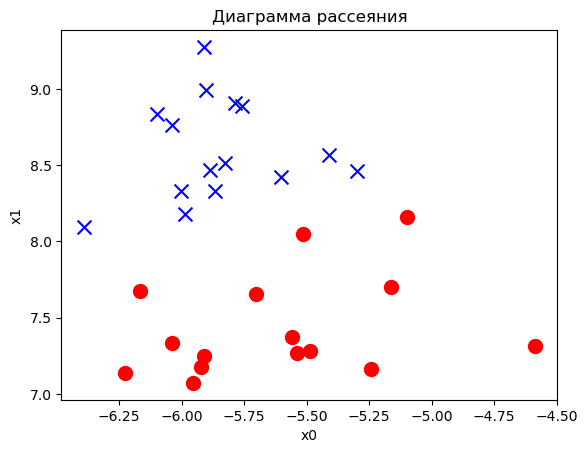

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [ ]:
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

In [ ]:
svm_linear.coef_


array([[-2.49920793,  6.14683189]])

In [ ]:
svm_linear.intercept_


array([-64.2533988])

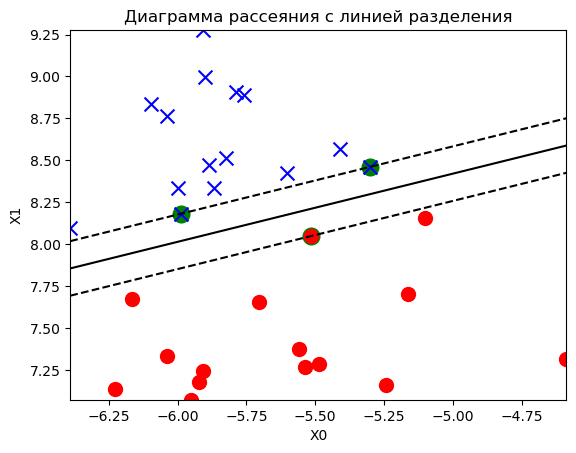

In [ ]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

In [ ]:
y_pred =  svm_linear.predict(X)

In [ ]:
metrics.accuracy_score(y, y_pred)

1.0

In [ ]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

In [ ]:
observation_new = [[-5.25, 7.5]]

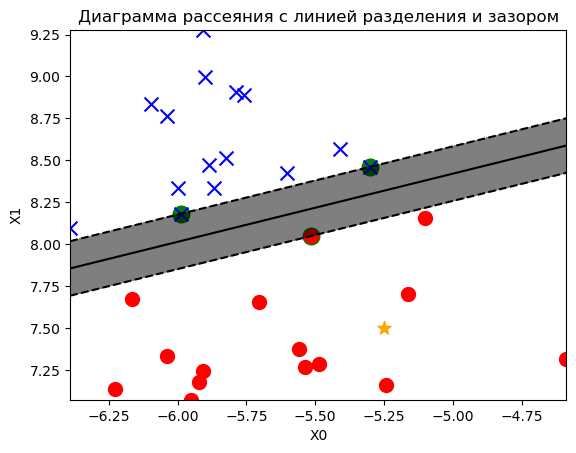

In [ ]:

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

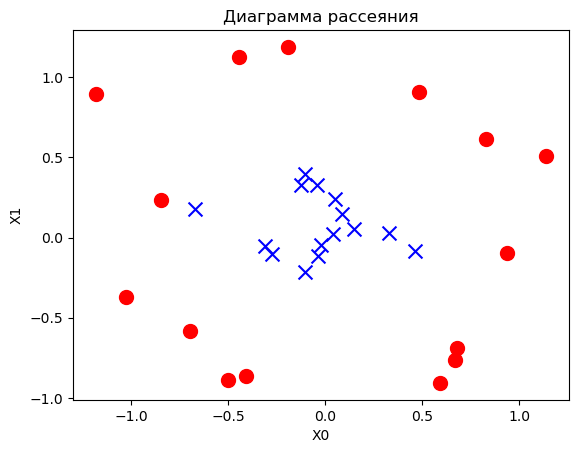

In [ ]:
X, y = datasets.make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)

In [ ]:
svm_rbf.n_support_
svm_rbf.support_
svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

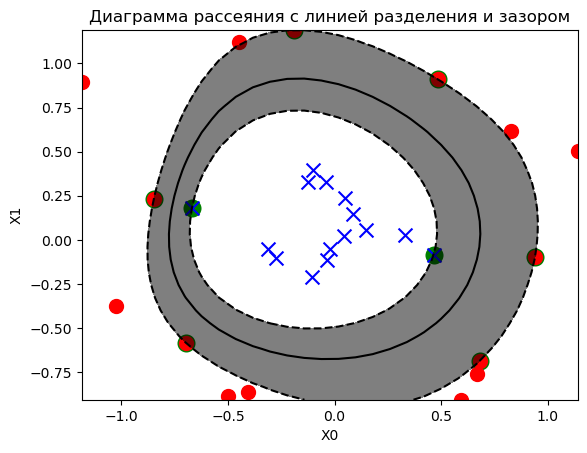

In [ ]:
plot_decision_regions(X, y, svm_rbf)

In [ ]:
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[7, 8],
       [8, 7]])

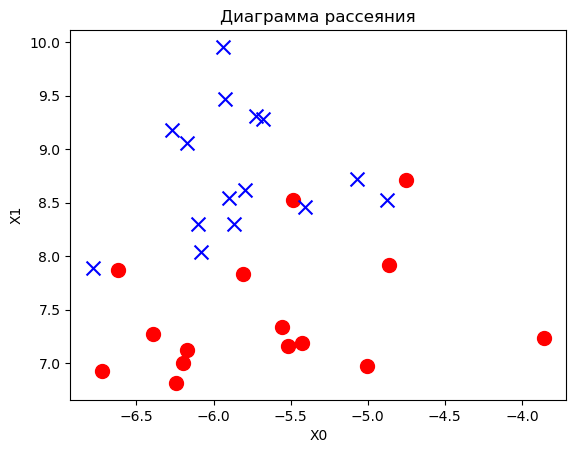

In [ ]:
X, y = datasets.make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)

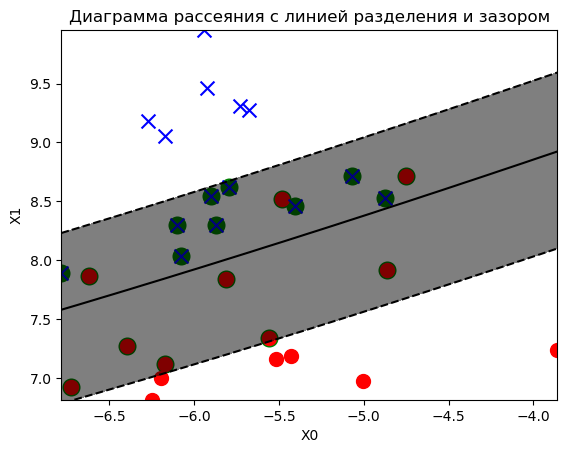

In [ ]:
plot_decision_regions(X, y, svm_poly)

In [ ]:
svm_poly.n_support_

array([9, 9], dtype=int32)

In [ ]:
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

# Задания для самостоятельного выполнения

#### 1. В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.


In [ ]:
X, y = datasets.make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

0.1 0.9666666666666667


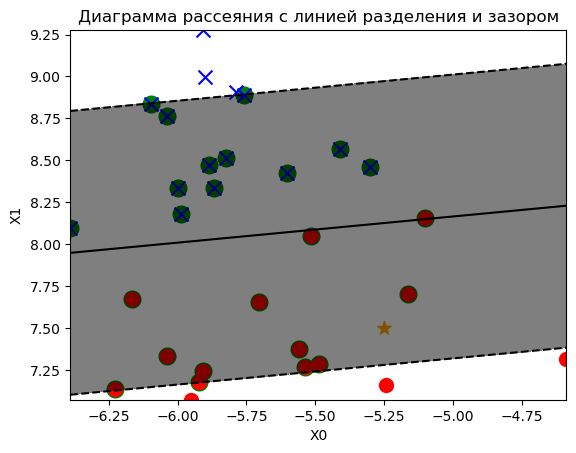

5.1 1.0


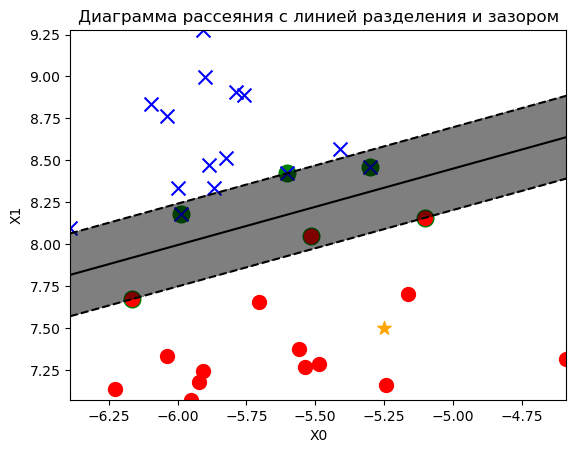

10.1 1.0


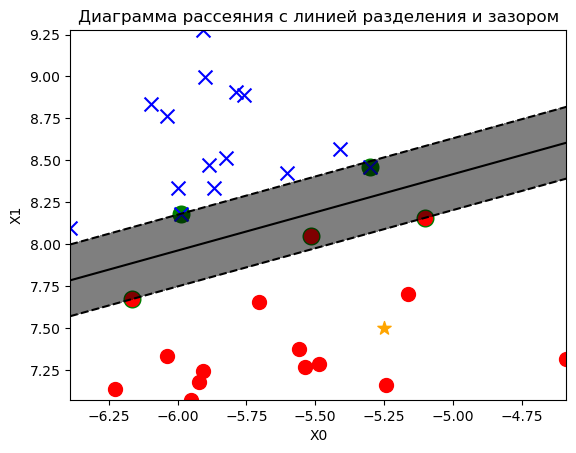

15.1 1.0


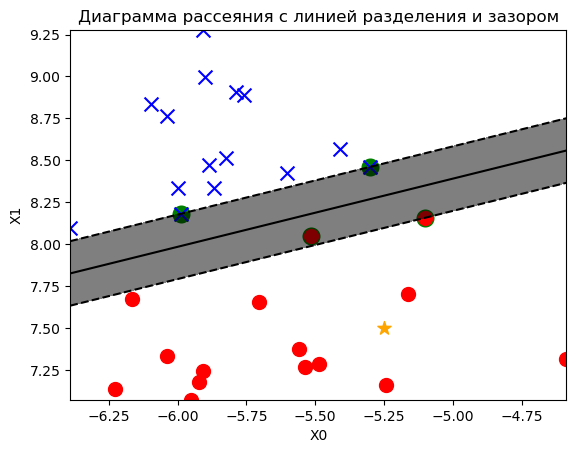

In [ ]:
for C in np.arange(0.1,20,5):
    svm_linear = SVC(kernel='linear', C=C)
    svm_linear.fit(X, y)
    y_pred =  svm_linear.predict(X)
    print(C,metrics.accuracy_score(y, y_pred))
    plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
    plot_decision_regions(X, y, svm_linear)

#### В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?

In [ ]:
X, y = datasets.make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

In [ ]:
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)


SVC(C=100, kernel='linear')

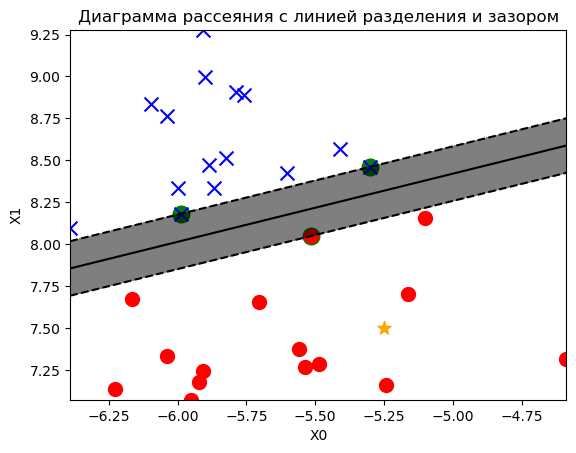

array([0])

In [ ]:
observation_new = [[-5.25, 7.5]]
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)
svm_linear.predict(observation_new)

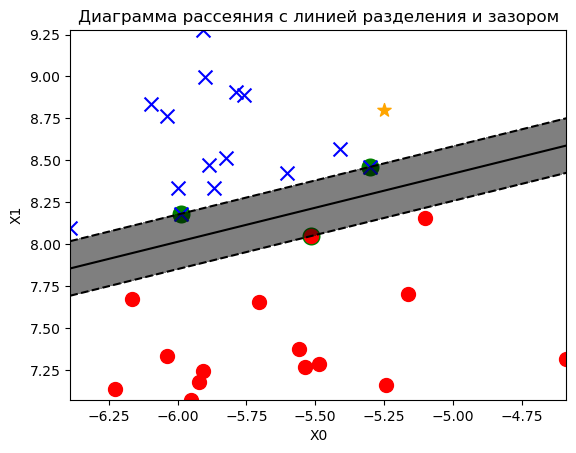

array([1])

In [ ]:
observation_new = [[-5.25, 8.8]]
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)
svm_linear.predict(observation_new)

#### Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.

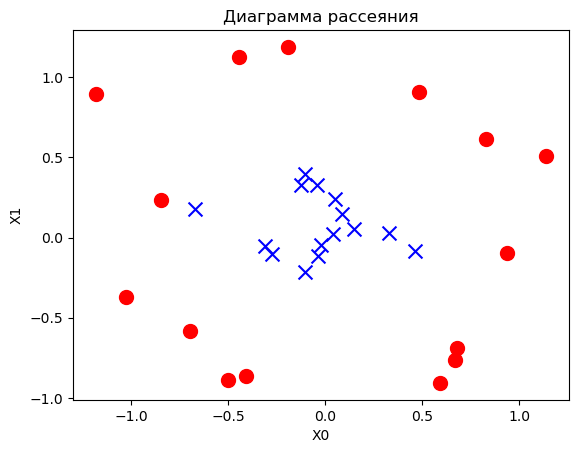

In [ ]:
X, y = datasets.make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

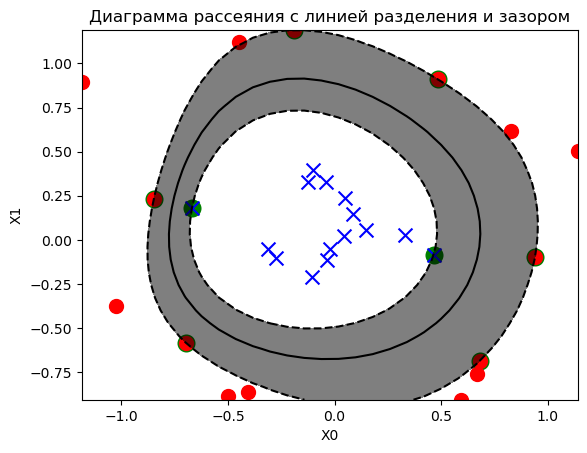

1.0

In [ ]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)
plot_decision_regions(X, y, svm_rbf)
svm_rbf.score(X, y)

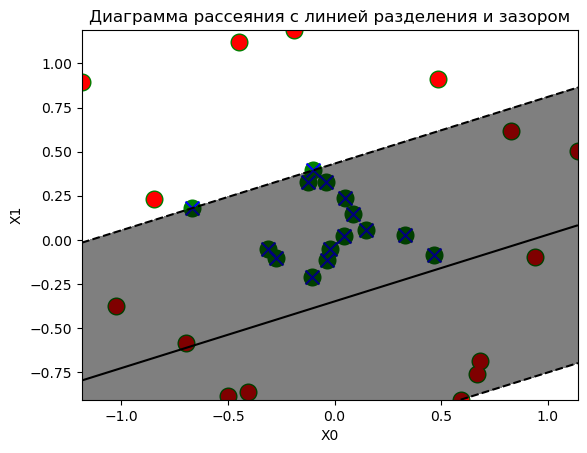

0.7

In [ ]:
svm_rbf = SVC(kernel = 'linear', C=100).fit(X, y)
plot_decision_regions(X, y, svm_rbf)
svm_rbf.score(X, y)

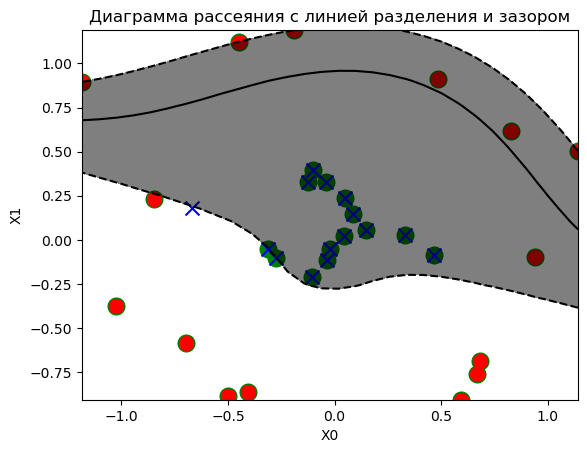

0.7

In [ ]:
svm_rbf = SVC(kernel = 'poly', C=100).fit(X, y)
plot_decision_regions(X, y, svm_rbf)
svm_rbf.score(X, y)

#### В третьем задании поэкспериментируйте со значением аргумента C. Сделайтевывод о том, как он влияет на модель.

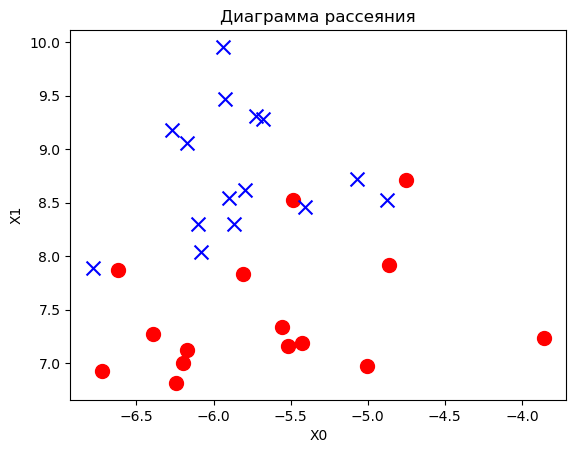

In [ ]:
X, y = datasets.make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

1 0.8


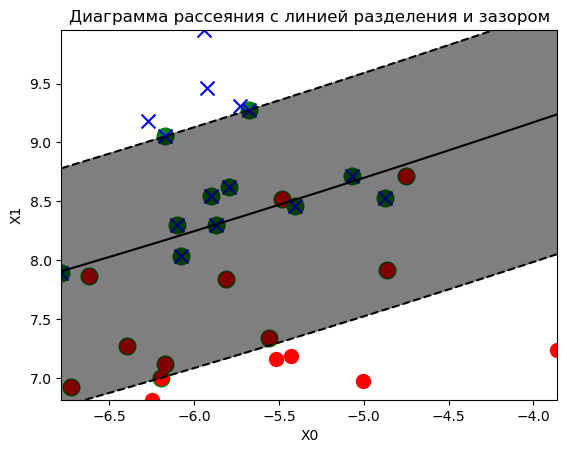

31 0.9


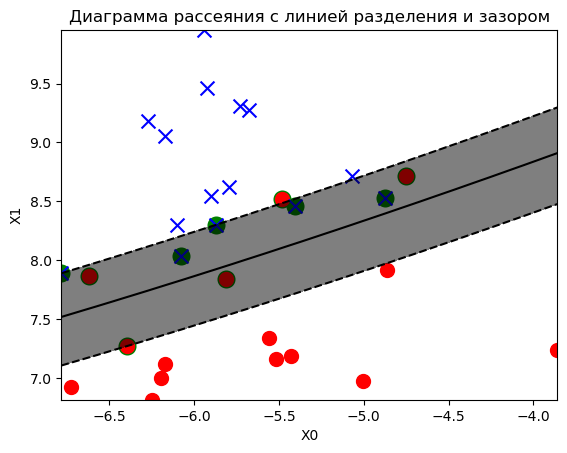

61 0.9


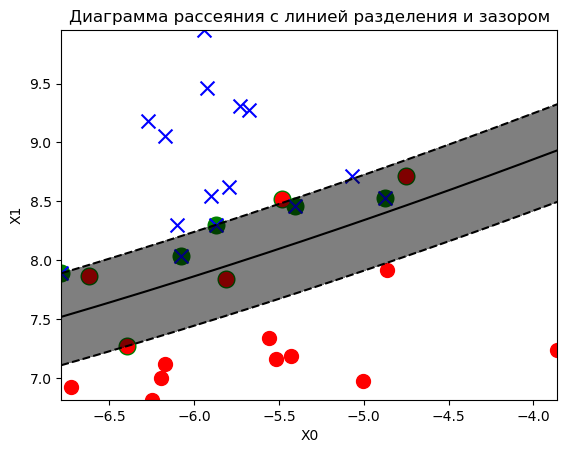

91 0.9


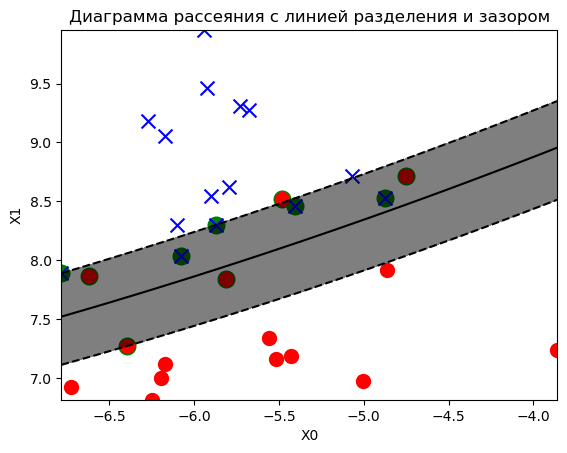

In [ ]:
for C in np.arange(1,100,30):
    svm_poly = SVC(kernel='poly', degree=4, C=C).fit(X, y)
    y_pred =  svm_poly.predict(X)
    print(C,svm_poly.score(X, y))
    plot_decision_regions(X, y, svm_poly)

#### В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.


In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svm_poly = LinearSVC(C=1).fit(X, y)
y_pred =  svm_poly.predict(X)
print(C,svm_poly.score(X, y))
# plot_decision_regions(X, y, svm_poly)

91 0.8


/Users/parlorsky/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.

In [ ]:
X, y = datasets.make_classification(n_features=5, n_samples=1000, random_state=7575)

In [ ]:
df = pd.DataFrame({}, columns =['kernel','C','score'])
for kernel in ['poly','linear','rbf']:
    for C in np.arange(1,100,5):
        svm_poly = SVC(kernel=kernel, C=C).fit(X, y)
        df.loc[df.shape[0]] = [kernel,C,svm_poly.score(X, y)]
df.sort_values(by = 'score',ascending=False)

,kernel,C,score
59,rbf,96,0.974
48,rbf,41,0.974
56,rbf,81,0.974
55,rbf,76,0.974
54,rbf,71,0.974
51,rbf,56,0.974
50,rbf,51,0.974
58,rbf,91,0.974
49,rbf,46,0.974
47,rbf,36,0.974


# 7

#### Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?

In [ ]:
import time

In [ ]:
for n_samples in np.arange(1000,100000,3000):
    start = time.time()
    X, y = datasets.make_classification(n_features=5, n_samples=n_samples, random_state=7575)
    svm_poly = SVC(kernel='rbf', C=96).fit(X, y)
    stop = time.time()
    duration = stop-start
    print(f"n_samples: {n_samples}, duration: {duration}")

n_samples: 1000, duration: 0.027889013290405273
n_samples: 4000, duration: 0.17502307891845703
n_samples: 7000, duration: 0.6745598316192627
n_samples: 10000, duration: 0.9644930362701416
n_samples: 13000, duration: 0.9970099925994873
n_samples: 16000, duration: 2.1092050075531006
n_samples: 19000, duration: 3.4209327697753906


KeyboardInterrupt: 

#### Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.

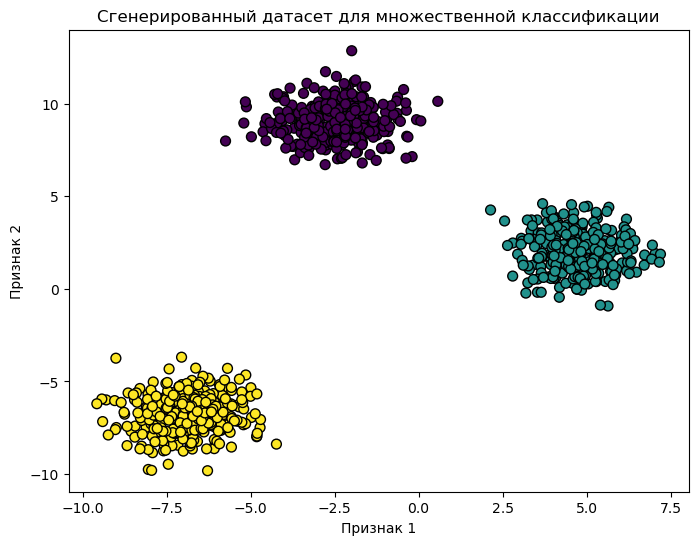

In [ ]:
# Генерация синтетического датасета
X, y = make_blobs(n_samples=1000, centers=3, random_state=42)

# Визуализация сгенерированных данных
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("Сгенерированный датасет для множественной классификации")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

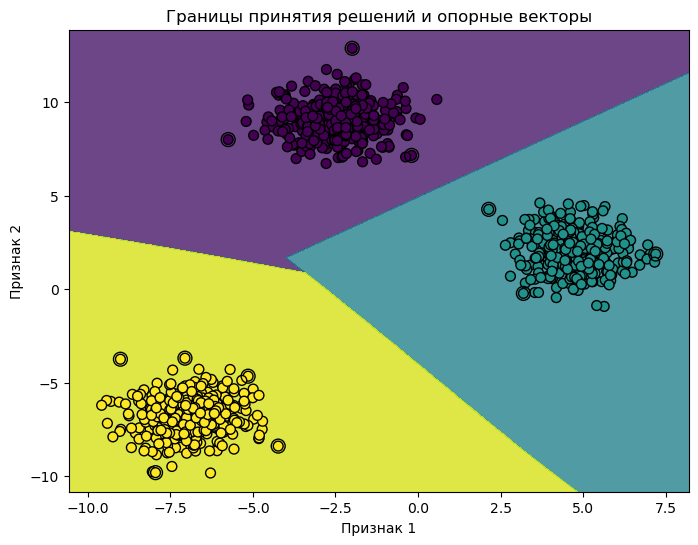

In [ ]:
def plot_decision_boundaries(X, y):

    h = .02  # размер шага в сетке
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Обучение модели
    model = SVC(kernel='rbf', C=98)
    model.fit(X, y)

    # Предсказание для каждой точки сетки
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Визуализация границ принятия решений
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap='viridis')
    plt.title("Границы принятия решений и опорные векторы")
    plt.xlabel("Признак 1")
    plt.ylabel("Признак 2")

    # Показ опорных векторов
    if hasattr(model, "support_vectors_"):
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
                    facecolors='none', edgecolors='k', marker='o')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Визуализация с использованием модели SVC (Support Vector Classifier)
plot_decision_boundaries(X, y)


#### Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error,accuracy_score,classification_report

In [ ]:
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

# Разделение данных на обучающую и тестовую выборку
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

# Создание и обучение модели SVM для классификации
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_iris, y_train_iris)

# Предсказание и оценка модели
y_pred_iris = svm_classifier.predict(X_test_iris)
accuracy_iris = accuracy_score(y_test_iris, y_pred_iris)
report_iris = classification_report(y_test_iris, y_pred_iris)

print(accuracy_iris)
print(report_iris)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### Повторите такой же анализ для задачи регрессии и соответствующего датасета.


In [ ]:
iris = datasets.load_iris()
# Используем датасет Iris и для регрессии
# Выберем длину лепестка в качестве зависимой переменной и остальные признаки как независимые
X_regression = iris.data[:, 1:]  # Все признаки кроме длины лепестка
y_regression = iris.data[:, 0]   # Длина лепестка

# Разделение данных на обучающую и тестовую выборку
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)


# Создание и обучение модели SVM для регрессии
svm_regressor_iris = SVR(kernel='linear')
svm_regressor_iris.fit(X_train_reg, y_train_reg)

# Предсказание и оценка модели
y_pred_reg = svm_regressor_iris.predict(X_test_reg)
rmse_iris = mean_squared_error(y_test_reg, y_pred_reg, squared=False)

rmse_iris

0.3057096226305397